# (Covid-19 Data Exploration)
## by (Kareem Ebraheem El-desouky Mohammed)

## Preliminary Wrangling

> The data is the last daily update at 15/08/2020 and contains the latest available public data on COVID-19. Each row/entry contains the number of new cases reported per day and per country
- IT can update automatically but i dont know if there permitted or no :)
- Data source ( https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx )

In [23]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [24]:
# load in the dataset into a pandas dataframe, print statistics
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx',parse_dates = ['dateRep'])
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-08-15,15,8,2020,7,0,Afghanistan,AF,AFG,38041757.0,Asia,1.895286
1,2020-08-14,14,8,2020,79,9,Afghanistan,AF,AFG,38041757.0,Asia,2.318505
2,2020-08-13,13,8,2020,76,10,Afghanistan,AF,AFG,38041757.0,Asia,2.297475
3,2020-08-12,12,8,2020,215,32,Afghanistan,AF,AFG,38041757.0,Asia,2.097695
4,2020-08-11,11,8,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,1.803282


## Clean the dataset

In [25]:
# delete weird cases
df.drop(df[df.countriesAndTerritories=='Cases_on_an_international_conveyance_Japan'].index,inplace=True)

In [26]:
# sort by country and date
df = df.sort_values(by=['countriesAndTerritories','dateRep'])

In [27]:
# reset ix
df=df.reset_index(drop=True)

In [28]:
# col renaming
df = df.rename(columns={'dateRep':'date',
                              'countriesAndTerritories':'country',
                              'countryterritoryCode':'countryCode',
                              'popData2019':'population',
                              'continentExp':'continent'})

In [29]:
# drop cols
df= df.drop(columns=['day','month','year','geoId','Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'])
# remove countries under pop 200000
df = df[df.population>200000]
# reset ix
df=df.reset_index(drop=True)
# add daycount
df['daycount'] = (df['date']-df['date'].min()).apply(lambda x: x.days)

In [30]:
df.head()

,date,cases,deaths,country,countryCode,population,continent,daycount
0,2019-12-31,0,0,Afghanistan,AFG,38041757.0,Asia,0
1,2020-01-01,0,0,Afghanistan,AFG,38041757.0,Asia,1
2,2020-01-02,0,0,Afghanistan,AFG,38041757.0,Asia,2
3,2020-01-03,0,0,Afghanistan,AFG,38041757.0,Asia,3
4,2020-01-04,0,0,Afghanistan,AFG,38041757.0,Asia,4


In [31]:
print(df.shape)
df.dtypes

(31474, 8)


date           datetime64[ns]
cases                   int64
deaths                  int64
country                object
countryCode            object
population            float64
continent              object
daycount                int64
dtype: object

In [32]:
df.cases.sum()

21205862

In [33]:
df.deaths.sum()

760191

In [34]:
df.country.value_counts().count()

177

In [35]:
df.continent.value_counts().count()

5

In [36]:
# descripe data 
df.describe()

,cases,deaths,population,daycount
count,31474.000000,31474.000000,3.147400e+04,31474.000000
mean,673.758086,24.152983,5.092198e+07,135.245472
std,3913.399293,138.192897,1.719289e+08,58.606869
min,-2461.000000,-5359.000000,2.150480e+05,0.000000
25%,0.000000,0.000000,3.996762e+06,94.000000
50%,14.000000,0.000000,1.064980e+07,140.000000
75%,174.000000,3.000000,3.647177e+07,184.000000
max,78427.000000,4928.000000,1.433784e+09,228.000000


In [37]:
df.isnull().sum()

date           0
cases          0
deaths         0
country        0
countryCode    0
population     0
continent      0
daycount       0
dtype: int64

### What is the structure of your dataset?

> There are 31474 row to descripe the data of 177 countries over 5 continent and there is approximately 21205862 cases and 760191 death till date 15 / 8 /2020

### What is/are the main feature(s) of interest in your dataset?

> I will work on death and cases curve behavior among countries and continets

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Sure Cases , death , population and daycount

## Univariate Exploration
i will use continent field for the first univariate graph to clear the exploration we need categorical field and there we just declare the value count of each continent in the dataset

In [38]:
df.continent.value_counts()

Europe     8892
Asia       8314
Africa     8172
America    5052
Oceania    1044
Name: continent, dtype: int64

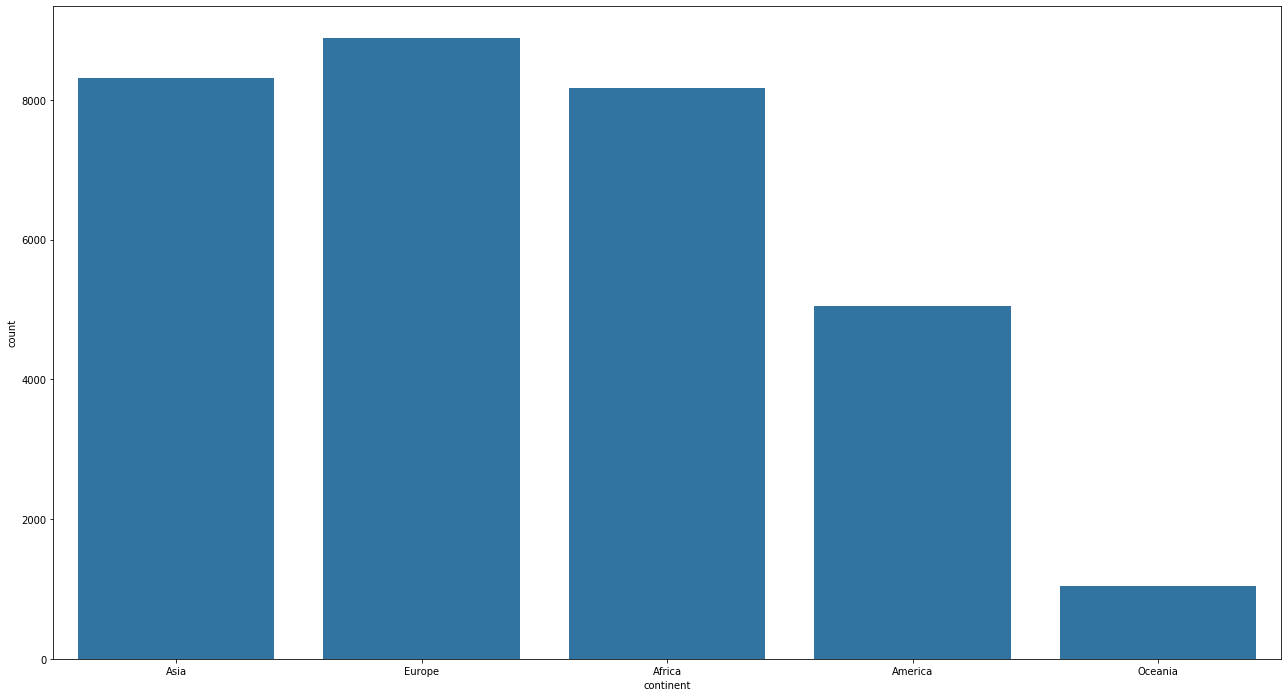

In [39]:
fig, ax = plt.subplots(figsize = [22,12])
default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'continent', color = default_color)
plt.show()

However Asia is the hieghest population number and Africa is the highest countries number , Europe has the highest value count that mean Europe countries the highet frequently in the dataser and the highest cases 

Now I'll look at the distribution of the main variable of my interest: cases

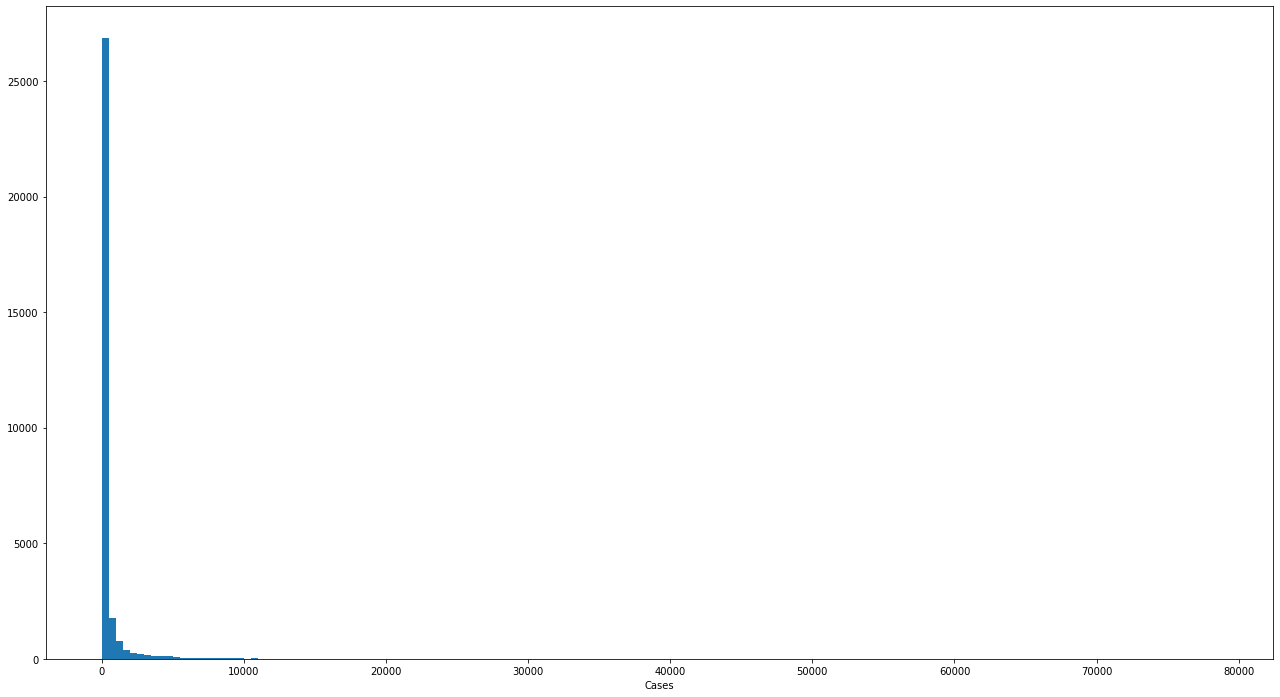

In [40]:
binsize = 500
bins = np.arange(0, df['cases'].max()+binsize, binsize)
plt.figure(figsize=[22, 12])
plt.hist(data = df, x = 'cases', bins = bins)
plt.xlabel('Cases')
plt.show()

I'll look at the distribution of the cases from 100 to 10000 caeses

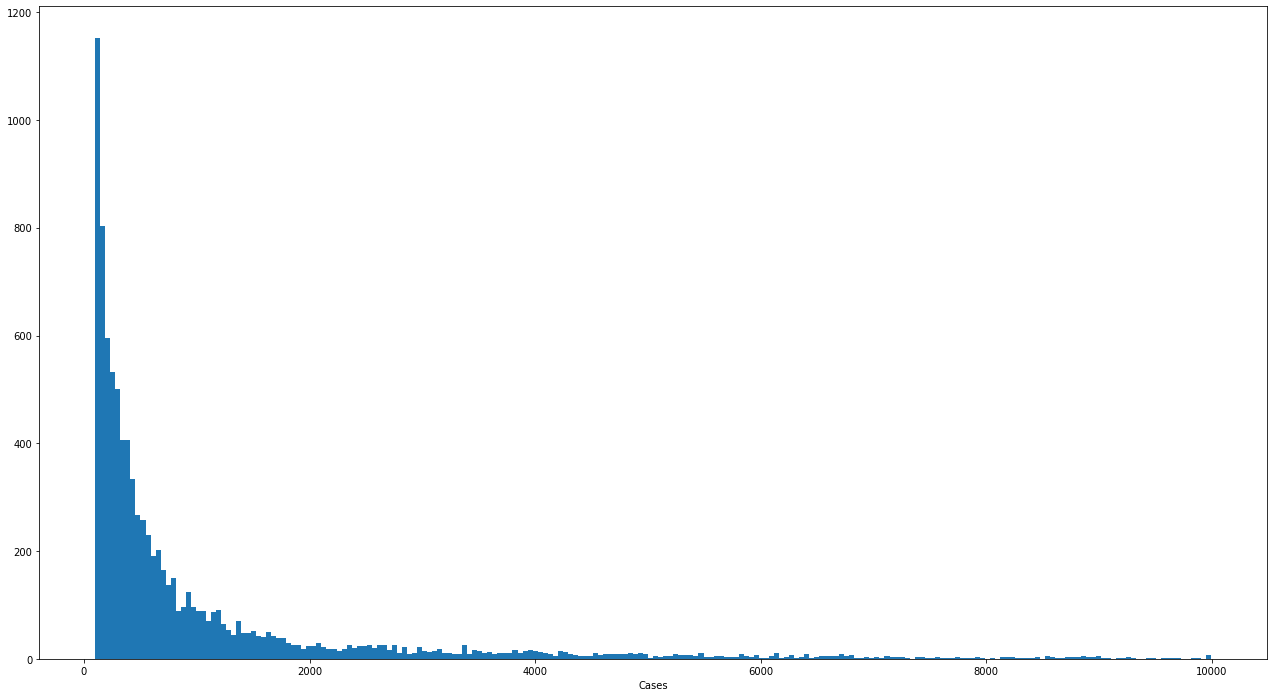

In [41]:
df2 = df[(df.cases > 99) & (df.cases <= 10000)]
plt.figure(figsize=[22, 12])
plt.hist(data = df2, x = 'cases', bins = 222)
plt.xlabel('Cases')
plt.show()

I'll look at the distribution of the cases from 10 to 100 caeses

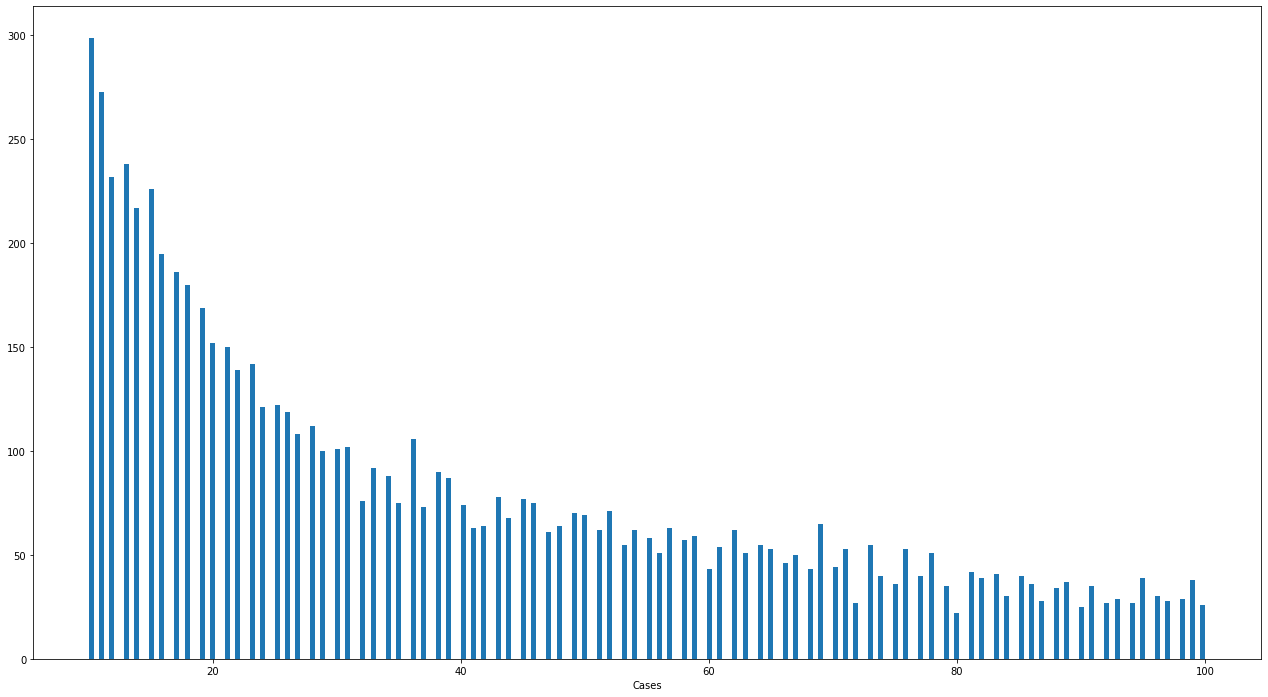

In [42]:
df3 = df[(df.cases > 9) & (df.cases <= 100)]
plt.figure(figsize=[22, 12])
plt.hist(data = df3, x = 'cases', bins = 222)
plt.xlabel('Cases')
plt.show()

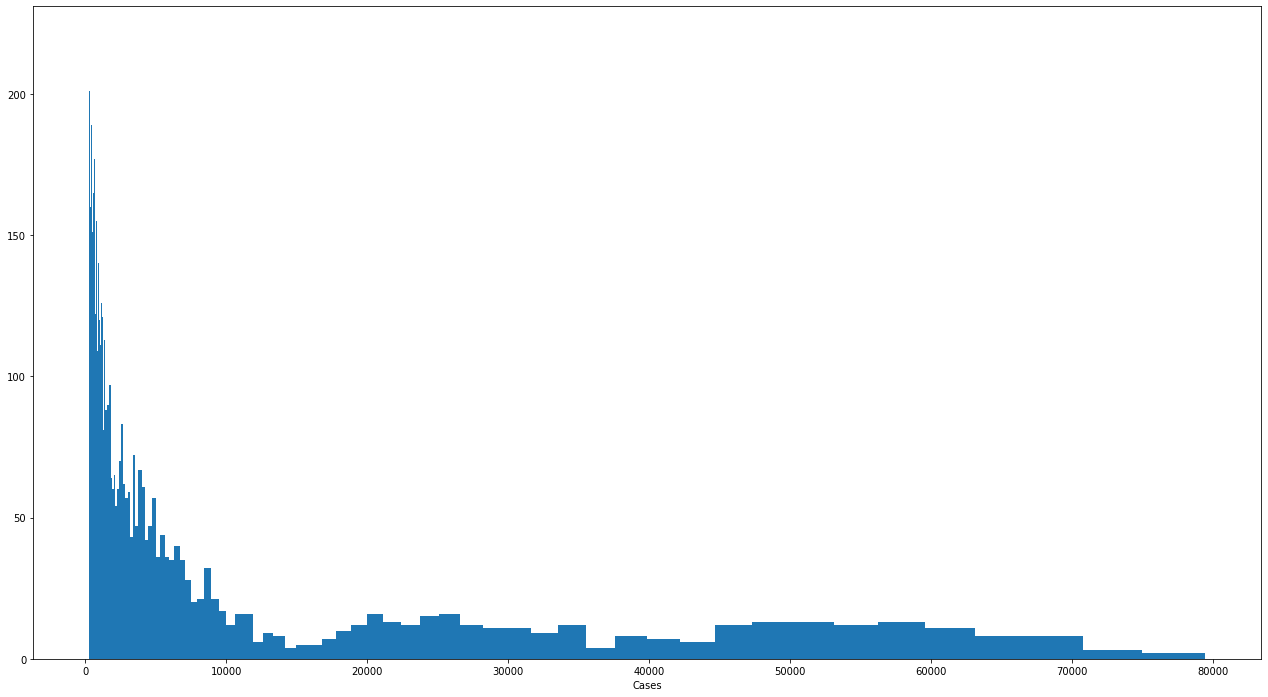

In [43]:
# there's a long tail in the distribution of all cases, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(df['cases'].max())+log_binsize, log_binsize)

plt.figure(figsize=[22, 12])
plt.hist(data = df, x = 'cases', bins = bins)
plt.xlabel('Cases')
plt.show()

From this exploration we find that is most country daily cases between 0 and 1000 cases and less countries have high daily number of daily cases and cases has a long-tailed distribution and when plotted on a log-scale there is a peak on 20000 cases

Now I'll look at the distribution of daily death number

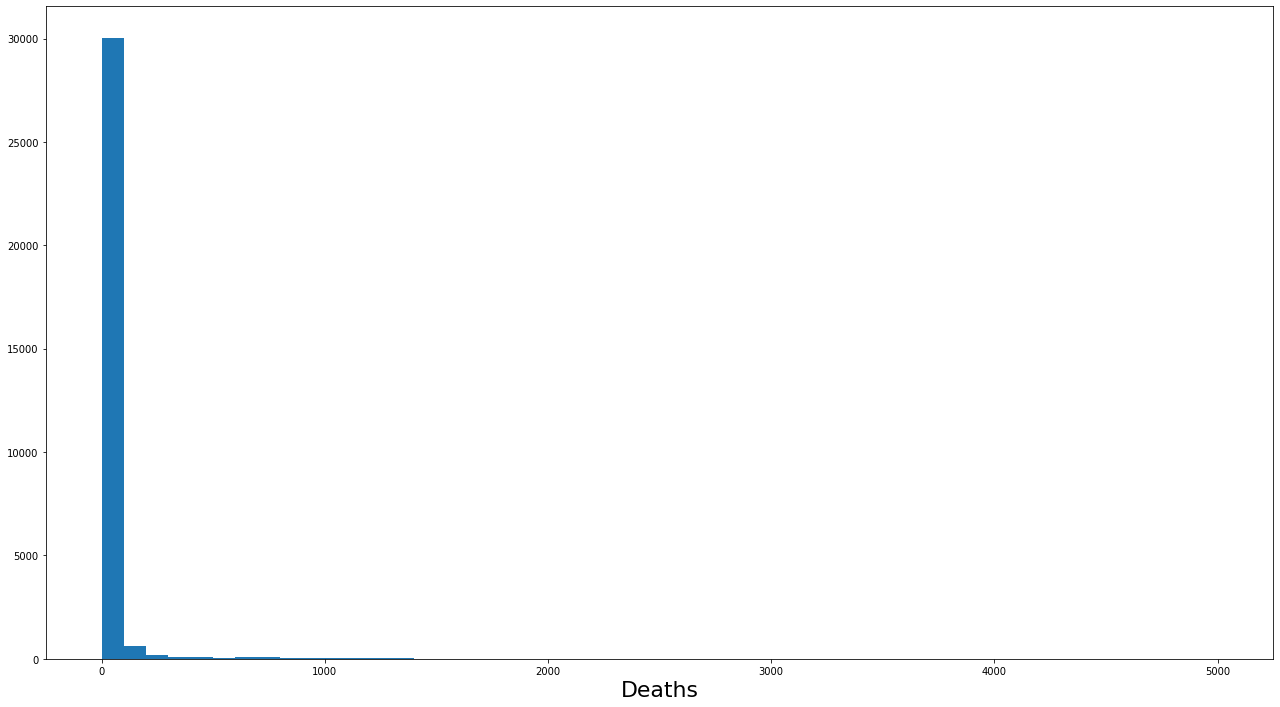

In [44]:
binsize = 100
bins = np.arange(0, df['deaths'].max()+binsize, binsize)
plt.figure(figsize=[22, 12])
plt.hist(data = df, x = 'deaths', bins = bins)
plt.xlabel('Deaths' , size = 22)
plt.show()

Most countries daily deaths number between 0 and 100

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The cases variable has large range of values so i maked log for this skewed values and there is one peak on 20000 cases

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> yes i change the defult bin size and make log for value cases

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

               cases    deaths  population  daycount
cases       1.000000  0.711419    0.265214  0.114025
deaths      0.711419  1.000000    0.190913  0.059820
population  0.265214  0.190913    1.000000 -0.071727
daycount    0.114025  0.059820   -0.071727  1.000000


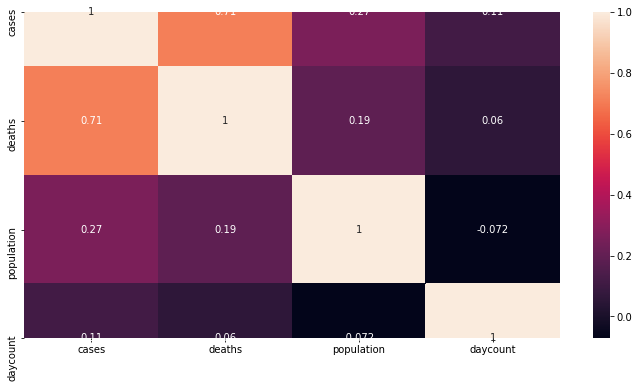

In [71]:
#show the correlation to know some information to start the analysis
corr = df.corr()
print (corr)
fig, ax = plt.subplots(figsize=[12, 6])
sb.heatmap(corr,annot=True)
plt.show()

There is a high correlation between cases and deaths and this normail

                            cases  deaths    population  daycount
country                                                          
United_States_of_America  5313080  168446  7.535587e+10     26106
Brazil                    3275520  106523  4.833034e+10     26106
India                     2526192   49036  3.115432e+11     26037
Russia                     912823   15498  3.340475e+10     26106
South_Africa               579140   11556  9.427881e+09     23823


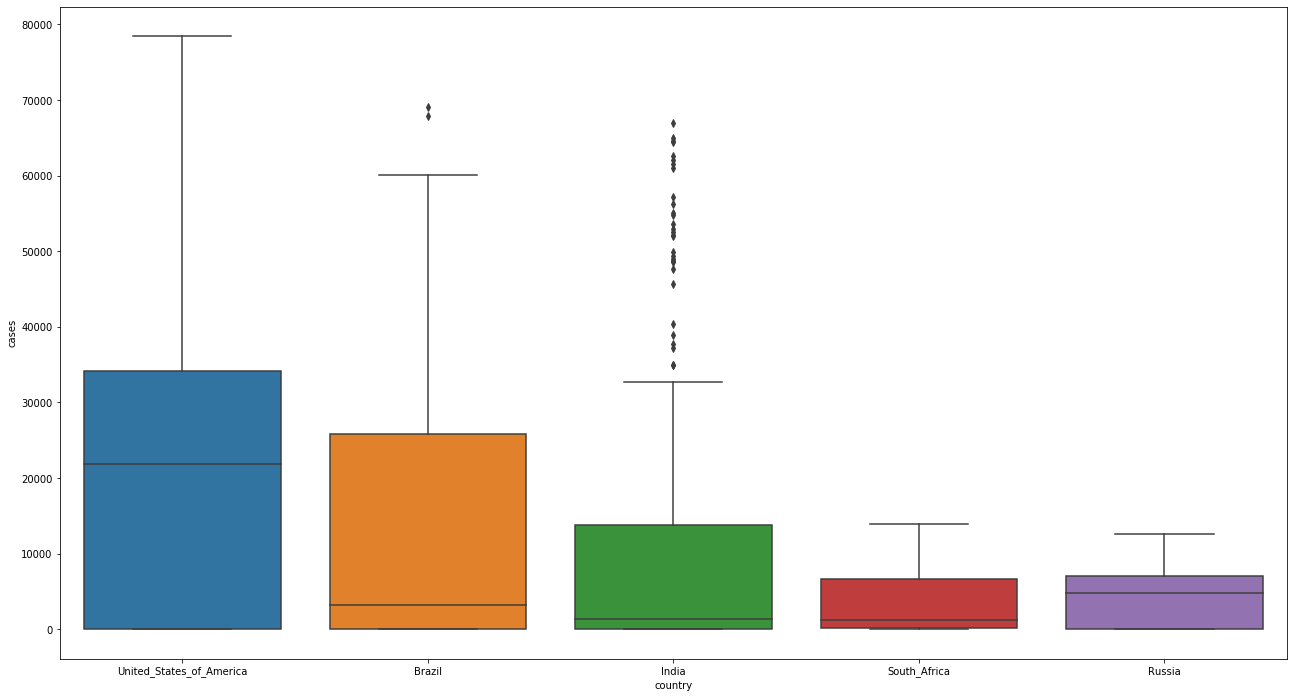

In [143]:
#make new sorted gruped by country dataframe 
df_groupcountries = df.groupby('country').sum()
print(df_groupcountries.sort_values(by=['cases'],ascending=False).head())
#make new datafram from the highest 5 countries
df_highest5 = df.loc[df.country.isin(['United_States_of_America','Brazil','India','Russia','South_Africa'])]
plt.figure(figsize=[22, 12])
sb.boxplot(x = 'country', y = 'cases', data = df_highest5.sort_values(by=['cases'],ascending=False))
plt.show()

The graph show the highest 5 cases countries and we see united states has high madian and india has outliears that mean untited states of america high infected with virus 

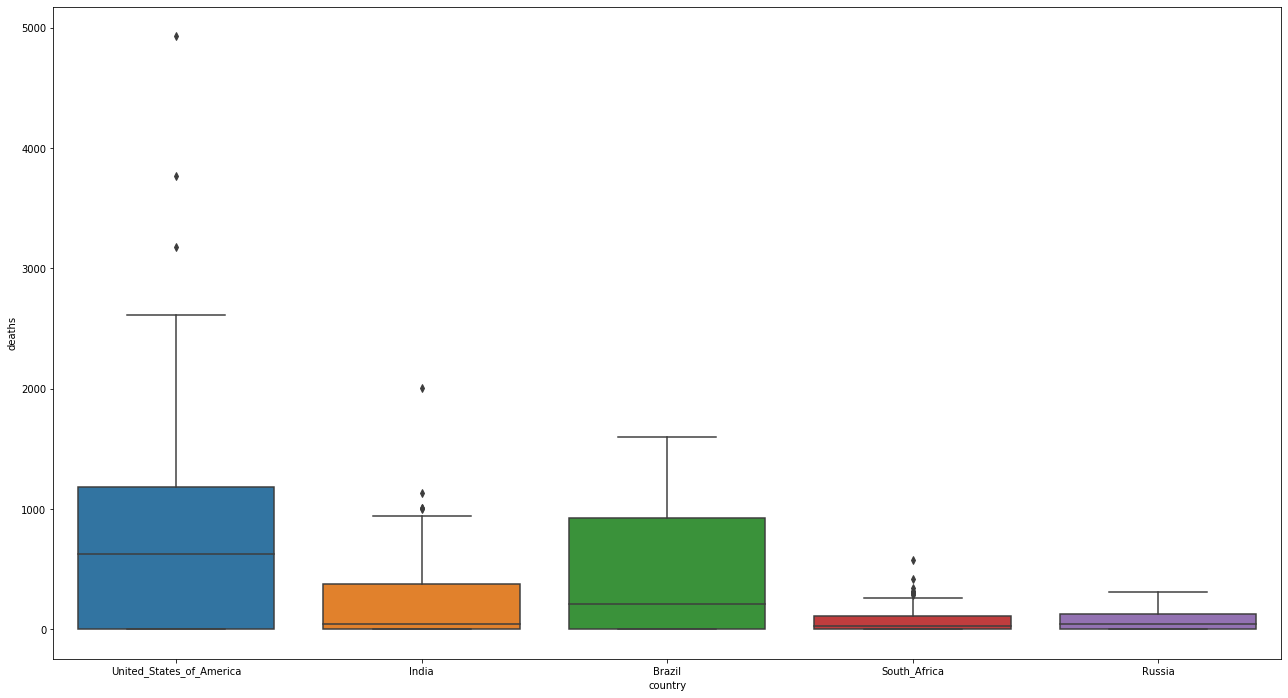

In [135]:
plt.figure(figsize=[22, 12])
sb.boxplot(x = 'country', y = 'deaths', data = df_highest5.sort_values(by=['deaths'],ascending=False))
plt.show()

The graph show the deaths of the highest 5 countries 

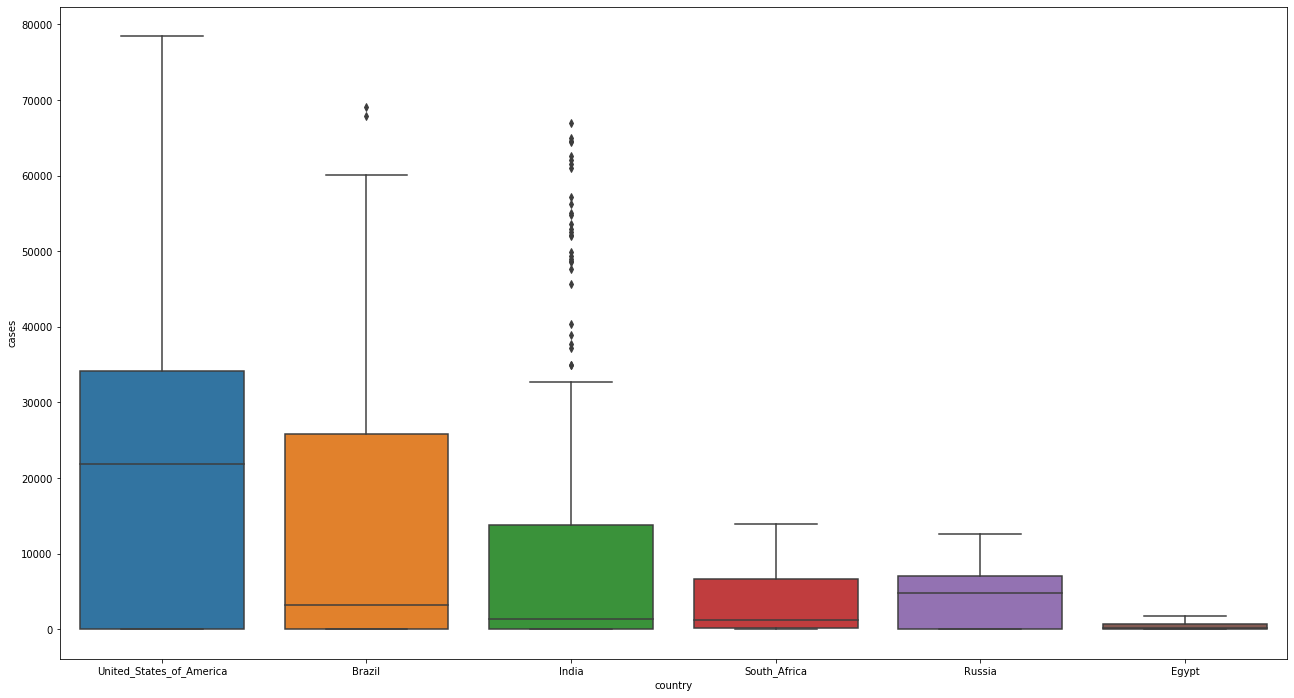

In [137]:
#compare egypt with the highest 5 countries 
df_highest5_eg = df.loc[df.country.isin(['United_States_of_America','Brazil','India','Russia','South_Africa','Egypt'])]
plt.figure(figsize=[22, 12])
sb.boxplot(x = 'country', y = 'cases', data = df_highest5_eg.sort_values(by=['cases'],ascending=False))
plt.show()

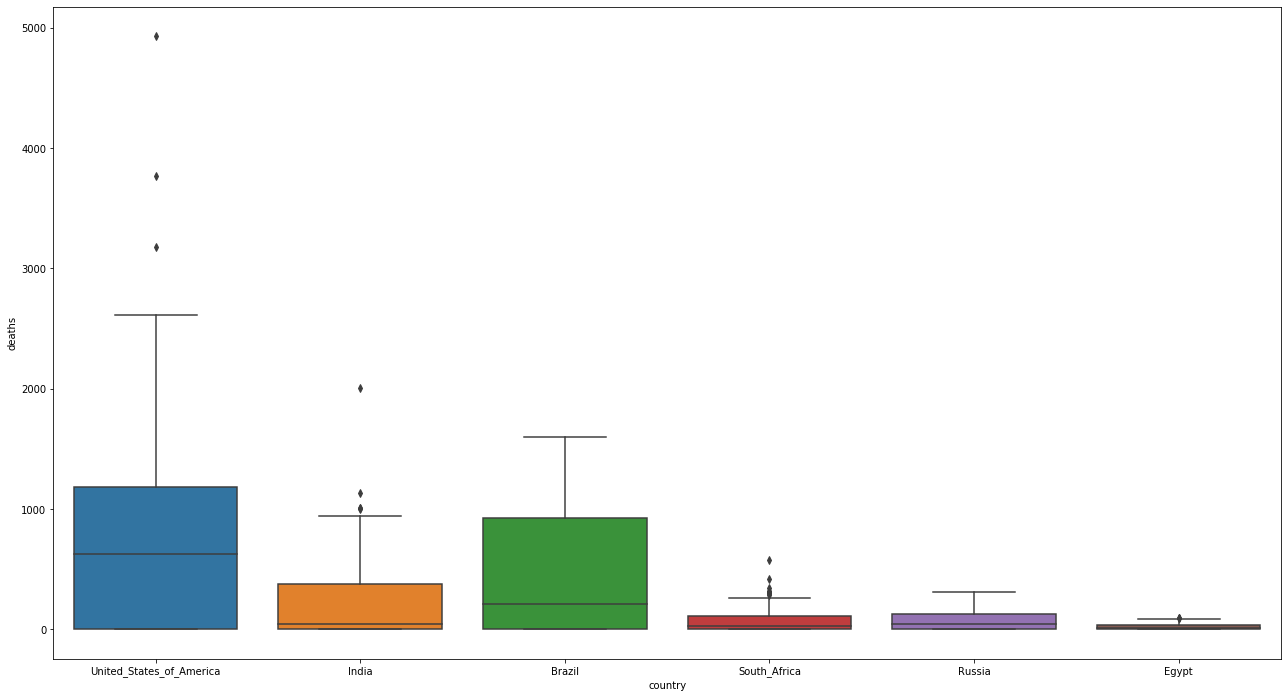

In [139]:
#compare egypt with the highest 5 countries deaths
plt.figure(figsize=[22, 12])
sb.boxplot(x = 'country', y = 'deaths', data = df_highest5_eg.sort_values(by=['deaths'],ascending=False))
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
Some countries have outliers of cases and desths that mean may be the results not accurate but still brazil and USA the hieghest countries of cases and desths and egypt not in bad situation

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> there is high rellation between cases and deaths and there is a relation between population and cases

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

<Figure size 1584x864 with 0 Axes>

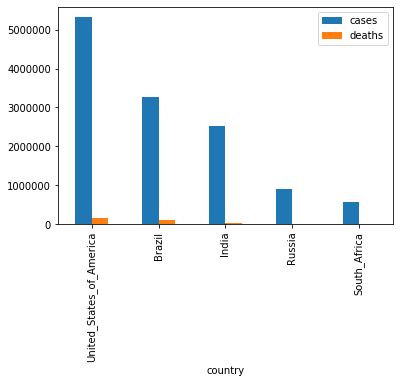

In [194]:
df_groupcountries_5 = df_groupcountries.sort_values(by=['cases'],ascending=False).head()
plt.figure(figsize=[22, 12])
df_groupcountries_5[['cases','deaths']].plot(kind='bar')
plt.show()

This graph show that however USA has more case but the setuation better than brazil and russia hasnt a lot of deaths according to high cases

<Figure size 1584x864 with 0 Axes>

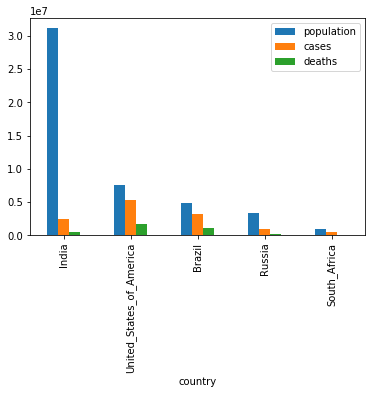

In [195]:
plt.figure(figsize=[22, 12])
df_groupcountries_5['population'] = df_groupcountries_5['population']/10000
df_groupcountries_5['deaths'] = df_groupcountries_5['deaths']*10
df_groupcountries_5[['population','cases','deaths']].sort_values(by=['population'],ascending=False).plot(kind='bar')
plt.show()

This graph show that india situation in better case because it has huge number of population compared with other countries

<Figure size 1584x864 with 0 Axes>

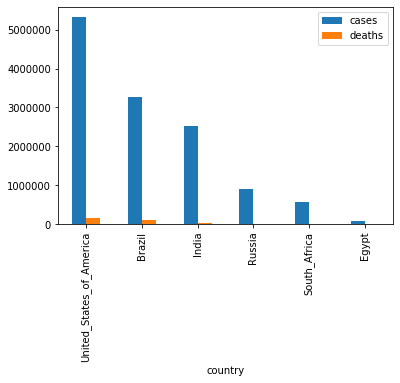

In [196]:
df_groupcountries_5_eg = df_groupcountries.loc[df_groupcountries.index.isin(['United_States_of_America','Brazil','India','Russia','South_Africa','Egypt'])]
plt.figure(figsize=[22, 12])
df_groupcountries_5_eg[['cases','deaths']].sort_values(by=['cases'],ascending=False).plot(kind='bar')
plt.show()

Egypt still in not bad situation

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 1584x864 with 0 Axes>

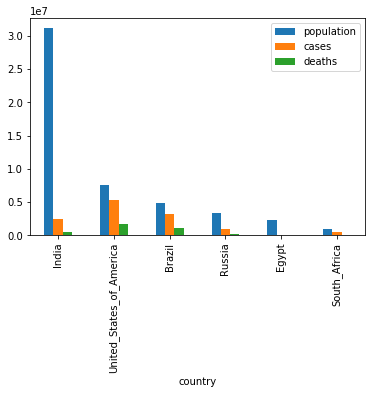

In [197]:
plt.figure(figsize=[22, 12])
df_groupcountries_5_eg['population'] = df_groupcountries_5_eg['population']/10000
df_groupcountries_5_eg['deaths'] = df_groupcountries_5_eg['deaths']*10
df_groupcountries_5_eg[['population','cases','deaths']].sort_values(by=['population'],ascending=False).plot(kind='bar')
plt.show()

Egypt infection small according to its population number

Thanks :)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> country population is  a very important factor to analysis the country infection and also desths has high relation with cases but not in all countries , some countries has high cases number but small deaths number that mean it has good medical care system

### Were there any interesting or surprising interactions between features?

> yes population feature very important

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!